# **Stock Price Project**

Joe Lardie

April 2023

# **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import json
import warnings
warnings.filterwarnings("ignore")
import pickle
import datetime as dt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from bs4 import BeautifulSoup
import yfinance as yf
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import IndexLocator

# **Obtain Price Function**

In [2]:
# Create Function to use web scrapping and obtain live data from Yahoo finance
def getData (symbol):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
    url = f'https://finance.yahoo.com/quote/{symbol}'
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    stock ={
    'symbol': symbol,    
    'price' : soup.find('div',{'class':'D(ib) Va(m) Maw(65%) Ov(h)'}).find_all('fin-streamer')[0].text,
    'Pchange' : soup.find('div',{'class':'D(ib) Va(m) Maw(65%) Ov(h)'}).find_all('fin-streamer')[1].text,
    'RMchange' : soup.find('div',{'class':'D(ib) Va(m) Maw(65%) Ov(h)'}).find_all('span')[1].text,
    }
    return stock

In [3]:
#Making a list of stock tickers to use for the loop
mystocks = ['BORR?p=BORR', 'KOS?p=KOS', 'COST?p=COST', 'QTUM?p=QTUM', 'CAT?p=CAT']

In [4]:
#Creating an empty list to store the data inside
stockdata = []

In [5]:
# Create a Loop to obtain multiple stocks data simaltaenously  
for item in mystocks:
    stockdata.append(getData(item))
    print('Getting: ',item)
with open('stockdata.json', 'w') as f:
    json.dump(stockdata, f)
    print(stockdata)
print('Fin.')

Getting:  BORR?p=BORR
Getting:  KOS?p=KOS
Getting:  COST?p=COST
Getting:  QTUM?p=QTUM
Getting:  CAT?p=CAT
[{'symbol': 'BORR?p=BORR', 'price': '7.39', 'Pchange': '-0.09', 'RMchange': '(-1.20%)'}, {'symbol': 'KOS?p=KOS', 'price': '7.20', 'Pchange': '-0.27', 'RMchange': '(-3.61%)'}, {'symbol': 'COST?p=COST', 'price': '496.90', 'Pchange': '0.00', 'RMchange': '(0.00%)'}, {'symbol': 'QTUM?p=QTUM', 'price': '45.02', 'Pchange': '-0.41', 'RMchange': '(-0.90%)'}, {'symbol': 'CAT?p=CAT', 'price': '224.67', 'Pchange': '-0.53', 'RMchange': '(-0.24%)'}]
Fin.


In [6]:
#Executinf the function of downloading the data from Yahoo finance
df = yf.download(['BORR?p=BORR', 'KOS?p=KOS', 'COST?p=COST', 'QTUM?p=QTUM', 'CAT?p=CAT'],
               start = '2011-01-01',
               end = '2023-04-12',
               progress = False)
print (f'Downloaded {len(df)} rows of data.')
df

Downloaded 3088 rows of data.


Adj Close                                                \
           BORR?P=BORR   CAT?P=CAT COST?P=COST KOS?P=KOS QTUM?P=QTUM   
Date                                                                   
2011-01-03         NaN   67.866920   54.211803       NaN         NaN   
2011-01-04         NaN   67.549744   54.107090       NaN         NaN   
2011-01-05         NaN   68.133636   53.104683       NaN         NaN   
2011-01-06         NaN   67.427223   52.850342       NaN         NaN   
2011-01-07         NaN   67.564178   52.850342       NaN         NaN   
...                ...         ...         ...       ...         ...   
2023-04-04        7.72  217.449997  497.730011      7.78   46.180000   
2023-04-05        7.33  213.529999  497.130005      7.82   45.419998   
2023-04-06        7.14  209.169998  485.980011      7.61   45.439999   
2023-04-10        7.78  215.529999  493.829987      7.79   45.810001   
2023-04-11        7.69  220.600006  498.649994      7.75   45.639999   

                 Close                                                ...  \
           BORR?P=BORR   CAT?P=CAT COST?P=COST KOS?P=KOS QTUM?P=QTUM  ...   
Date                                                                  ...   
2011-01-03         NaN   94.150002   72.470001       NaN         NaN  ...   
2011-01-04         NaN   93.709999   72.330002       NaN         NaN  ...   
2011-01-05         NaN   94.519997   70.989998       NaN         NaN  ...   
2011-01-06         NaN   93.540001   70.650002       NaN         NaN  ...   
2011-01-07         NaN   93.730003   70.650002       NaN         NaN  ...   
...                ...         ...         ...       ...         ...  ...   
2023-04-04        7.72  217.449997  497.730011      7.78   46.180000  ...   
2023-04-05        7.33  213.529999  497.130005      7.82   45.419998  ...   
2023-04-06        7.14  209.169998  485.980011      7.61   45.439999  ...   
2023-04-10        7.78  215.529999  493.829987      7.79   45.810001  ...   
2023-04-11        7.69  220.600006  498.649994      7.75   45.639999  ...   

                  Open                                                \
           BORR?P=BORR   CAT?P=CAT COST?P=COST KOS?P=KOS QTUM?P=QTUM   
Date                                                                   
2011-01-03         NaN   94.379997   72.750000       NaN         NaN   
2011-01-04         NaN   94.639999   72.529999       NaN         NaN   
2011-01-05         NaN   93.269997   71.989998       NaN         NaN   
2011-01-06         NaN   94.709999   70.360001       NaN         NaN   
2011-01-07         NaN   93.860001   70.949997       NaN         NaN   
...                ...         ...         ...       ...         ...   
2023-04-04        8.05  228.899994  496.500000      7.91   46.490002   
2023-04-05        7.68  216.199997  499.000000      7.71   45.849998   
2023-04-06        7.37  212.669998  482.000000      7.75   45.000000   
2023-04-10        7.21  210.220001  483.899994      7.68   45.139999   
2023-04-11        7.64  216.169998  493.829987      7.85   45.990002   

                Volume                                               
           BORR?P=BORR CAT?P=CAT COST?P=COST  KOS?P=KOS QTUM?P=QTUM  
Date                                                                 
2011-01-03         NaN   5231500     3405500        NaN         NaN  
2011-01-04         NaN   6119300     3966700        NaN         NaN  
2011-01-05         NaN   4118100     4270100        NaN         NaN  
2011-01-06         NaN   4106300     3280400        NaN         NaN  
2011-01-07         NaN   4547800     2342700        NaN         NaN  
...                ...       ...         ...        ...         ...  
2023-04-04   1509900.0   4282100     1913300  2736000.0     20500.0  
2023-04-05   1410700.0   4265300     1941500  3895700.0     10300.0  
2023-04-06    807100.0   4180100     4114700  3419400.0      6900.0  
2023-04-10   2363000.0   3839000     1653600  4962700.0     35100.0  
2023-0

# **Visualizations of Stock Closing Prices**

## **QTUM Closing price (2011/01/01-2023/04/12)**

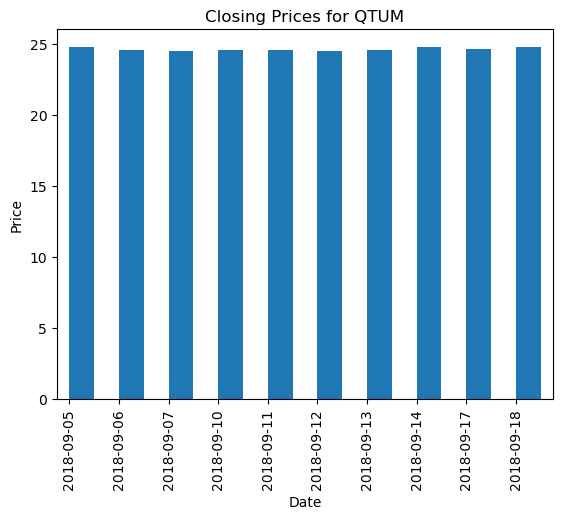

In [7]:
df = yf.download('QTUM', start='2011-01-01', end='2023-04-12', progress=False)

# Only show the first 10 rows of the DataFrame
df_first_10 = df.head(10)

# Extract the closing prices from the DataFrame
closing_prices = df_first_10['Close']

# Create a bar plot of the closing prices
ax = closing_prices.plot(kind='bar')

# Set the
# Set the x-axis to show only the first 10 dates
ax.xaxis.set_major_locator(IndexLocator(base=1, offset=0))
ax.set_xticklabels(closing_prices.index.strftime('%Y-%m-%d'))

# Set the plot title and axis labels
plt.title('Closing Prices for QTUM')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

## **BORR Closing price (2019/07/30-2023/04/12)**

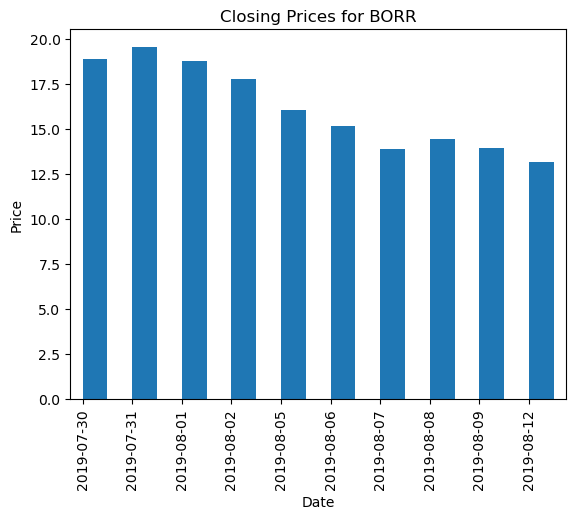

In [8]:
df = yf.download('BORR', start='2011-01-01', end='2023-04-12', progress=False)

# Only show the first 10 rows of the DataFrame
df_first_10 = df.head(10)

# Extract the closing prices from the DataFrame
closing_prices = df_first_10['Close']

# Create a bar plot of the closing prices
ax = closing_prices.plot(kind='bar')

# Set the
# Set the x-axis to show only the first 10 dates
ax.xaxis.set_major_locator(IndexLocator(base=1, offset=0))
ax.set_xticklabels(closing_prices.index.strftime('%Y-%m-%d'))

# Set the plot title and axis labels
plt.title('Closing Prices for BORR')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

## **COST Closing price (2011/01/01-2023/04/12)**

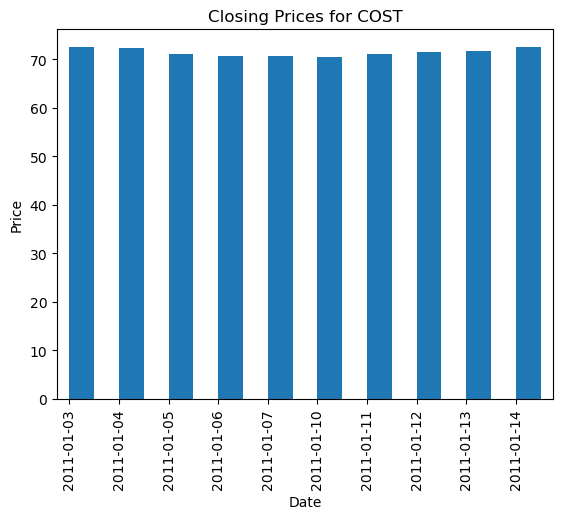

In [9]:
df = yf.download('COST', start='2011-01-01', end='2023-04-12', progress=False)

# Only show the first 10 rows of the DataFrame
df_first_10 = df.head(10)

# Extract the closing prices from the DataFrame
closing_prices = df_first_10['Close']

# Create a bar plot of the closing prices
ax = closing_prices.plot(kind='bar')

# Set the
# Set the x-axis to show only the first 10 dates
ax.xaxis.set_major_locator(IndexLocator(base=1, offset=0))
ax.set_xticklabels(closing_prices.index.strftime('%Y-%m-%d'))

# Set the plot title and axis labels
plt.title('Closing Prices for COST')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

## **KOS Closing price (2011/05/11-2023/04/12)**

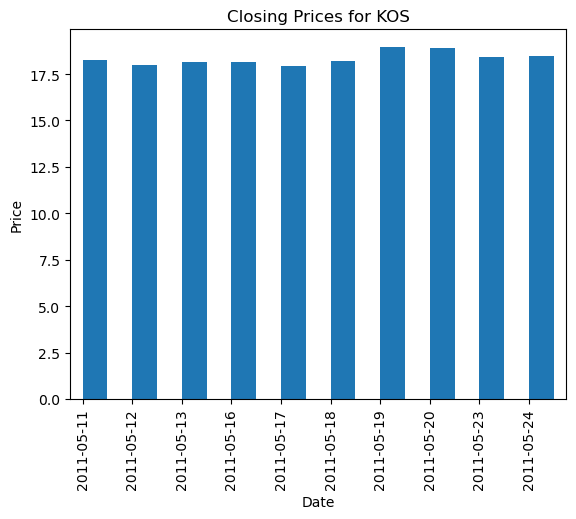

In [10]:
df = yf.download('KOS', start='2011-01-01', end='2023-04-12', progress=False)

# Only show the first 10 rows of the DataFrame
df_first_10 = df.head(10)

# Extract the closing prices from the DataFrame
closing_prices = df_first_10['Close']

# Create a bar plot of the closing prices
ax = closing_prices.plot(kind='bar')

# Set the
# Set the x-axis to show only the first 10 dates
ax.xaxis.set_major_locator(IndexLocator(base=1, offset=0))
ax.set_xticklabels(closing_prices.index.strftime('%Y-%m-%d'))

# Set the plot title and axis labels
plt.title('Closing Prices for KOS')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

## **CAT Closing price (2011/01/03-2023/04/12)**

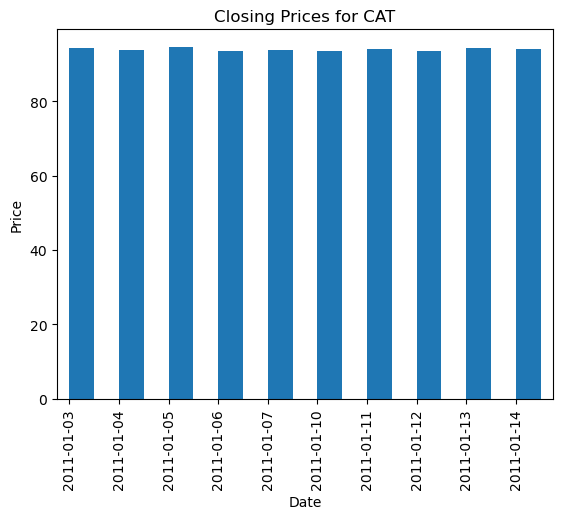

In [11]:
df = yf.download('CAT', start='2011-01-01', end='2023-04-12', progress=False)

# Only show the first 10 rows of the DataFrame
df_first_10 = df.head(10)

# Extract the closing prices from the DataFrame
closing_prices = df_first_10['Close']

# Create a bar plot of the closing prices
ax = closing_prices.plot(kind='bar')

# Set the
# Set the x-axis to show only the first 10 dates
ax.xaxis.set_major_locator(IndexLocator(base=1, offset=0))
ax.set_xticklabels(closing_prices.index.strftime('%Y-%m-%d'))

# Set the plot title and axis labels
plt.title('Closing Prices for CAT')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()